In [2]:
# import necessary modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import math 
%matplotlib inline

/Users/chitwood/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
# read in data
df = pd.read_csv("./licor_preliminary.csv") 

# remove outliers
df = df[df.E>0] # remove negative and zero values for ln() later
df = df[df.A>0] # remove negative and zero values for ln() later

# create WUEi, instantaneous water use efficiency
df["WUEi"] = df["A"]/df["E"]

# remove outliers
df = df[df.WUEi<8000] # remove extreme WUEi values

# create a composite factor of scion-rootstock-location
df["sci_root_loc"] = df["scion"] + df["rootstock"] + df["location"]

# create a composite factor of scion-year
df["sci_year"] = df["scion"] + df["year"]

Text(0, 0.5, 'A, photosynthetic rate, $\\mu$mol $m^{-2}$ $s^{-1}$')

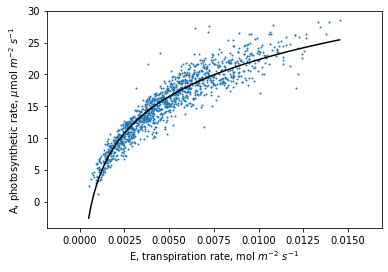

In [4]:
# define function to model A/E

def func(x, m, b):
    return m*np.log(x) - b # natural log

E = df["E"].to_numpy() # convert to numpy array
A = df["A"].to_numpy() # convert to numpy array

params, covs = curve_fit(func, E, A) # fit a curve

xrange = np.linspace(np.min(E), np.max(E), 100) # specify range to model

# plot results
plt.scatter(df["E"], df["A"], s=1)
plt.plot(xrange, func(xrange, params[0], params[1]), c="k")
plt.xlabel(r"E, transpiration rate, mol $m^{-2}$ $s^{-1}$") # used latex for greek symbols and superscripts
plt.ylabel(r"A, photosynthetic rate, $\mu$mol $m^{-2}$ $s^{-1}$")

In [5]:
# calculate WUEi residuals from model of A vs E
df["WUEi_resid"] = df["A"] - func(df["E"], params[0], params[1])

# mask Freedom rootstock and Liberty location
freedom = df[df["rootstock"]=="Freedom"]
liberty = df[df["location"]=="Liberty"]

Text(0.5, 1.0, 'Freedom rootstock: \n across locations and by scion')

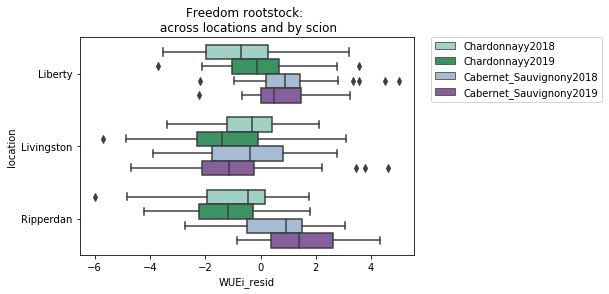

In [6]:
# for Freedom, compare residuals of WUEi across locations

my_order = ["Chardonnayy2018","Chardonnayy2019","Cabernet_Sauvignony2018","Cabernet_Sauvignony2019"]
pal = ["#99d8c9","#2ca25f","#9ebcda","#8856a7"]


sns.boxplot(data=freedom, x="WUEi_resid", y="location", hue="sci_year", hue_order=my_order, palette=pal)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Freedom rootstock: \n across locations and by scion")

Text(0.5, 1.0, 'Liberty location: \n across rootstocks and by scion')

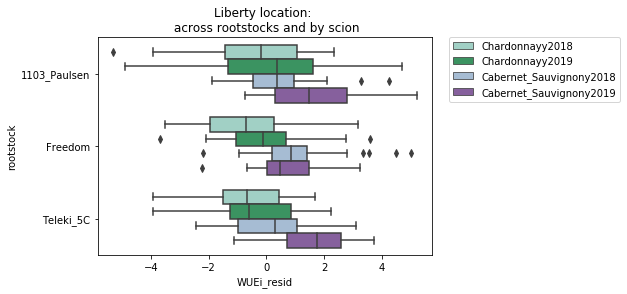

In [7]:
# for Liberty, compare residuals of WUEi across rootstocks

my_order = ["Chardonnayy2018","Chardonnayy2019","Cabernet_Sauvignony2018","Cabernet_Sauvignony2019"]
pal = ["#99d8c9","#2ca25f","#9ebcda","#8856a7"]


sns.boxplot(data=liberty, x="WUEi_resid", y="rootstock", hue="sci_year", hue_order=my_order, palette=pal)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Liberty location: \n across rootstocks and by scion")